![](data/venn_ml.png)

![](data/ext_sklearn.jpeg)

![](data/sklearn.png)

# WorkFlow

+ Obtener datos
+ Definir objetivo
+ Limpieza de datos (unidades, outliers, one-hot, etc..)
+ Definir modelo (regresión, clasificación, ...)
+ Entrenar (hiperparámetros, validación, ...) (**)
+ Predecir (testear)
+ Evaluar
+ Si hay mucho error volver a (**)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
census  = pd.read_csv('data/census.csv')
census.head(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [5]:
census['TotalPop'].max()

10038388

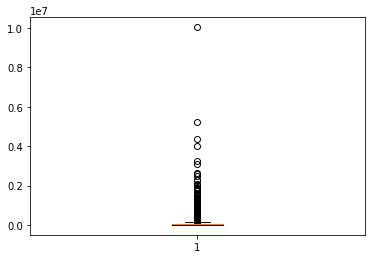

In [6]:
plt.boxplot(census['TotalPop'])
plt.show();

In [7]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

In [8]:
census.isna().sum()

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [9]:
census.dropna(axis = 0, inplace = True)

In [10]:
census.isna().sum()

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [11]:
census.shape

(3218, 37)

In [12]:
q1 = census['TotalPop'].quantile(0.25)
q3 = census['TotalPop'].quantile(0.75)

In [13]:
census_pop_clean = census[(census['TotalPop']> q1) & (census['TotalPop'] < q3)]

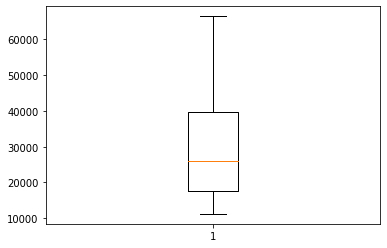

In [14]:
plt.boxplot(census_pop_clean['TotalPop'])
plt.show();

In [15]:
import warnings
warnings.simplefilter('ignore')

def escala(x):
    return (x/100).round(3)

conversion=['Hispanic','White', 'Black', 'Native',
            'Asian', 'Pacific', 'Poverty', 'ChildPoverty',
            'Service', 'Office']

In [16]:
n_columns = [x+' Rate' for x in conversion]
n_columns

['Hispanic Rate',
 'White Rate',
 'Black Rate',
 'Native Rate',
 'Asian Rate',
 'Pacific Rate',
 'Poverty Rate',
 'ChildPoverty Rate',
 'Service Rate',
 'Office Rate']

In [17]:
census_pop_clean[n_columns] = census_pop_clean[conversion].apply(escala)

In [18]:
census_pop_clean.head(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Hispanic Rate,White Rate,Black Rate,Native Rate,Asian Rate,Pacific Rate,Poverty Rate,ChildPoverty Rate,Service Rate,Office Rate
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.012,0.533,0.438,0.001,0.004,0.0,0.254,0.392,0.166,0.219


In [19]:
census_pop_clean.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Hispanic Rate',
       'White Rate', 'Black Rate', 'Native Rate', 'Asian Rate', 'Pacific Rate',
       'Poverty Rate', 'ChildPoverty Rate', 'Service Rate', 'Office Rate'],
      dtype='object')

In [20]:
census_pop_clean.reset_index(inplace = True, drop = True)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [22]:
census_pop_clean

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Hispanic Rate,White Rate,Black Rate,Native Rate,Asian Rate,Pacific Rate,Poverty Rate,ChildPoverty Rate,Service Rate,Office Rate
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242
1,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231
2,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178
3,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239
4,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.012,0.533,0.438,0.001,0.004,0.0,0.254,0.392,0.166,0.219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,72143,Puerto Rico,Vega Alta,39319,18762,20557,98.6,1.1,0.0,0.0,...,0.986,0.011,0.000,0.000,0.000,0.0,0.503,0.638,0.195,0.292
1604,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,0.964,0.034,0.001,0.000,0.000,0.0,0.485,0.561,0.216,0.247
1605,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,0.997,0.000,0.000,0.000,0.000,0.0,0.540,0.683,0.210,0.218
1606,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,0.998,0.002,0.000,0.000,0.001,0.0,0.523,0.621,0.259,0.207


{'whiskers': [<matplotlib.lines.Line2D at 0x2898ff1e188>,
 'caps': [<matplotlib.lines.Line2D at 0x2898ff3cec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2898ff3c248>],
 'medians': [<matplotlib.lines.Line2D at 0x2898ff3cfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2898ff45cc8>],
 'means': []}

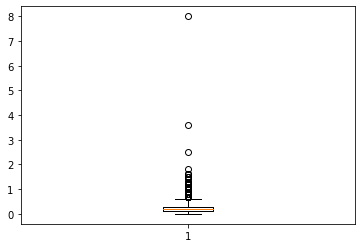

In [23]:
plt.boxplot(census_pop_clean['FamilyWork'])

In [24]:
census_pop_clean['FamiliWork_scaled'] = MinMaxScaler().fit_transform(census_pop_clean['FamilyWork'].values.reshape(-1,1))

{'whiskers': [<matplotlib.lines.Line2D at 0x2898ff9a6c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2898ffb7ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2898ffb7188>],
 'medians': [<matplotlib.lines.Line2D at 0x2898ffbcac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2898ffbcb08>],
 'means': []}

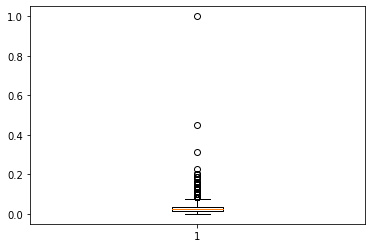

In [25]:
plt.boxplot(census_pop_clean['FamiliWork_scaled'])

In [26]:
q1_fam =  census_pop_clean['FamiliWork_scaled'].quantile(0.25)
q3_fam =  census_pop_clean['FamiliWork_scaled'].quantile(0.75)

In [27]:
census_pop_clean= census_pop_clean[(census_pop_clean['FamiliWork_scaled']< q3_fam)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2898fff3c48>,
 'caps': [<matplotlib.lines.Line2D at 0x289fd519108>,
 'boxes': [<matplotlib.lines.Line2D at 0x289fda54488>],
 'medians': [<matplotlib.lines.Line2D at 0x289fda50e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x289fda72c08>],
 'means': []}

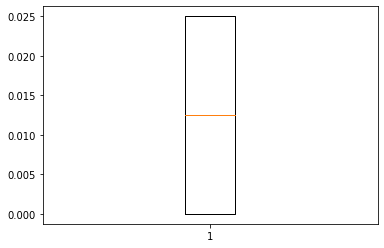

In [28]:
plt.boxplot(census_pop_clean['FamiliWork_scaled'])

In [29]:
state = pd.get_dummies(census_pop_clean['State'])

In [30]:
state

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Florida,Georgia,Idaho,Illinois,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
census_pop_clean

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,White Rate,Black Rate,Native Rate,Asian Rate,Pacific Rate,Poverty Rate,ChildPoverty Rate,Service Rate,Office Rate,FamiliWork_scaled
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.758,0.185,0.004,0.010,0.000,0.129,0.186,0.170,0.242,0.0000
1,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.462,0.467,0.002,0.004,0.000,0.267,0.453,0.161,0.231,0.0125
4,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.533,0.438,0.001,0.004,0.000,0.254,0.392,0.166,0.219,0.0250
5,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,0.573,0.403,0.002,0.008,0.000,0.216,0.372,0.145,0.263,0.0000
9,1025,Alabama,Clarke,25070,11834,13236,0.3,53.4,45.3,0.0,...,0.534,0.453,0.000,0.004,0.004,0.247,0.298,0.150,0.255,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,72143,Puerto Rico,Vega Alta,39319,18762,20557,98.6,1.1,0.0,0.0,...,0.011,0.000,0.000,0.000,0.000,0.503,0.638,0.195,0.292,0.0000
1604,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,0.034,0.001,0.000,0.000,0.000,0.485,0.561,0.216,0.247,0.0000
1605,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.540,0.683,0.210,0.218,0.0250
1606,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,0.002,0.000,0.000,0.001,0.000,0.523,0.621,0.259,0.207,0.0000


In [32]:
census_dum = pd.concat([state,census_pop_clean], axis = 1)

In [33]:
census_dum.drop('State', axis = 1, inplace = True)
census_dum.drop('County', axis = 1, inplace = True)

In [34]:
import seaborn as sns

In [35]:
plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<AxesSubplot:>

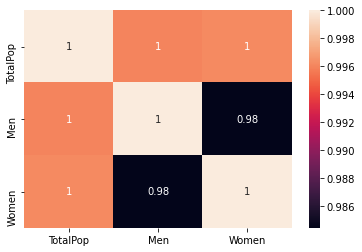

In [36]:
sns.heatmap(census_dum[['TotalPop','Men','Women']].corr(), annot = True)

In [37]:
from sklearn.model_selection import train_test_split as tts

In [38]:
y = census_dum.pop('TotalPop')# variable a predecir

In [39]:
x_train, x_test, y_train, y_test = tts(census_dum,y, test_size = 0.10, train_size = 0.90, random_state = 34)

In [40]:
#x_train seran mis variables explicativas conlas que entrenare el modelo
#y_train sera mi variable a explicar con la que entranare el modelo
#x_test seran mis variables con las que probare mi modelo
#y_test sera mi variable a comparar con la prediccion

In [41]:
#Modelo
from sklearn.linear_model import LinearRegression as LinReg 
#Se importa el modelo de regresion lineal
from sklearn.metrics import r2_score

In [42]:
linreg = LinReg()# Se asinga el modelo a una variable 

In [43]:
linreg.fit(x_train,y_train) # Se entrena el modelo con x_Train y y_train

LinearRegression()

In [46]:
y_pred=linreg.predict(x_test) #Se hace la prediccion con x_test

In [50]:
y_pred - y_test #Diferencia entre lo predicho y lo real

303    -1.455192e-11
398    -7.275958e-12
502     0.000000e+00
965     0.000000e+00
1395    1.637090e-11
            ...     
665     0.000000e+00
211     1.455192e-11
662     0.000000e+00
812     1.091394e-11
1401    3.637979e-12
Name: TotalPop, Length: 102, dtype: float64

In [51]:
r2_score(y_pred,y_test)

1.0

In [64]:
y_test.reset_index(inplace = True, drop = True)

<AxesSubplot:>

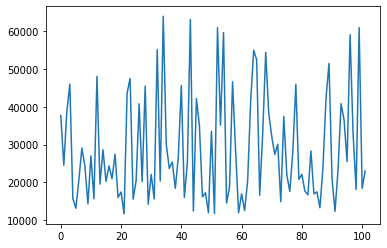

In [65]:
y_test.plot()

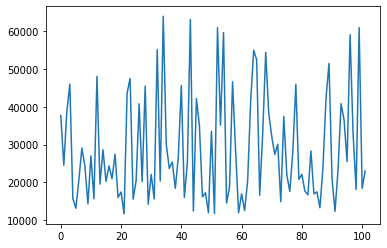

In [60]:
plt.plot(y_pred)

In [ ]:
plt.plot(y_pred)